In [24]:
import cv2
from matplotlib import pyplot as plt


In [25]:
def applyGlobalThreshold(img,threshold):
        newImg = img
        
        newImg[newImg > threshold] = 255
        newImg[newImg != 255] = 0
        
        return newImg

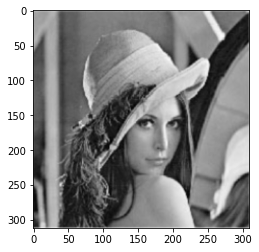

In [26]:
img = cv2.imread('lena.jpg',0)
plt.imshow(img,cmap='gray')

In [27]:
def get_histogram(img, bins):
    flattenedImage = getFlatttenedImage(img)

    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in flattenedImage:
        histogram[pixel] += 1

    # histogram,bins =  np.histogram(img.flatten(),bins=256,range=(0,255))
    plt.clf()
    plt.hist(flattenedImage,256)
    plt.show()
    # return our final result
    return histogram


In [28]:
def cumsum(img):
    a = get_histogram(img,256)
    a = np.array(a)
    b = []

    isFirstElement = True
    for i in a:
        if isFirstElement:
            b.append(a[0])
            isFirstElement = False
            continue
        b.append(b[-1] + i)
    
    b = np.array(b)
    plt.clf()
    plt.plot(b)
    plt.show()
    return b

In [29]:
def getFlatttenedImage(img):
    img = np.asarray(img)
    img = img.flatten()

    return img



In [30]:
import numpy as np
def getEqualised(img):
    
    cumulativeSum = cumsum(img)

    cumulativeSum /= cumulativeSum[-1]
    cumulativeSum *= 255
    cumulativeSum = cumulativeSum.astype('uint8')
    
    flattenedImg = getFlatttenedImage(img)
    newImg = cumulativeSum[flattenedImg]
    newImg = np.reshape(newImg,img.shape)


    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    fig.add_subplot(1,2,1)
    plt.imshow(img, cmap='gray')

    # display the new image
    fig.add_subplot(1,2,2)
    plt.imshow(newImg, cmap='gray')

    plt.show(block=True)

    cumsum(newImg)


    return newImg

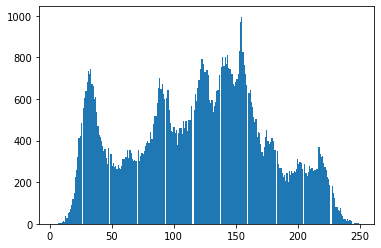

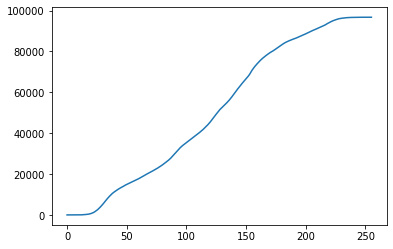

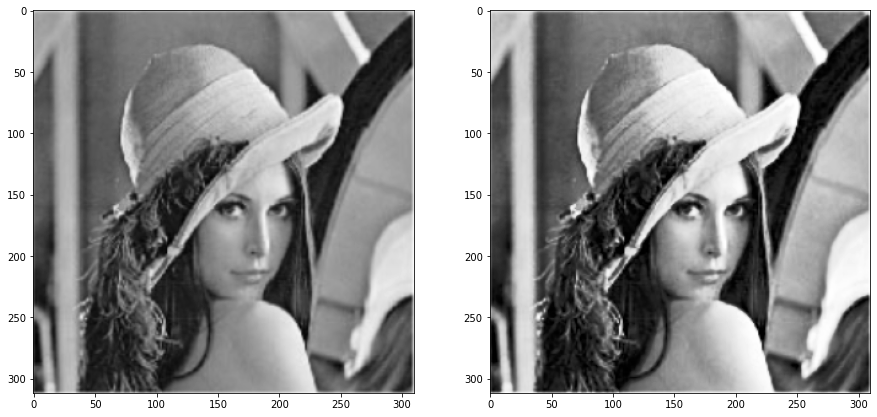

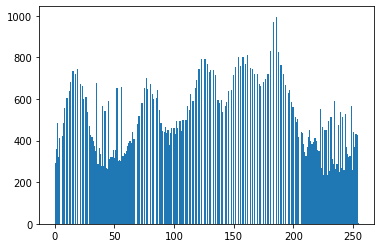

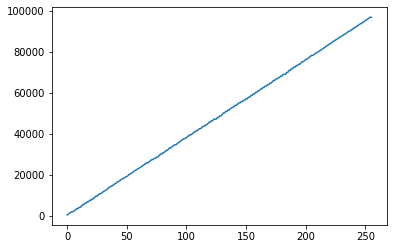

array([[254, 254, 254, ..., 254, 254, 254],
       [240, 227, 224, ..., 228, 239, 253],
       [233, 215, 207, ..., 211, 228, 249],
       ...,
       [ 98,  31,   6, ...,  75, 150, 229],
       [128,  55,  44, ..., 114, 188, 235],
       [207, 146, 135, ..., 207, 227, 248]], dtype=uint8)

In [31]:
getEqualised(img)

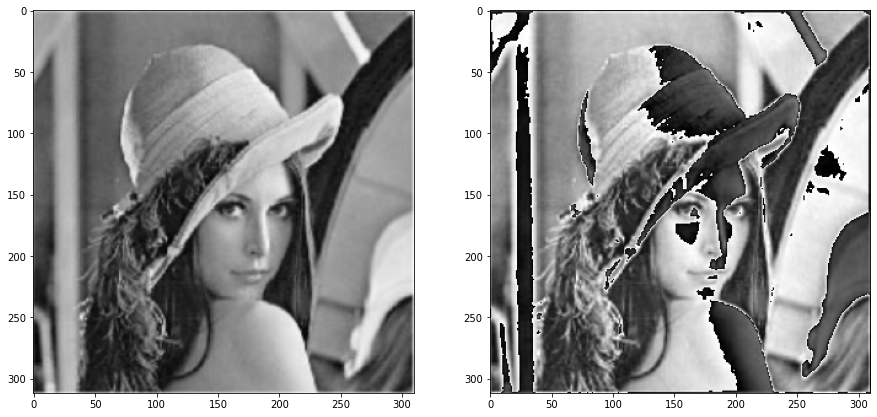

In [32]:
from copy import deepcopy

def getNormalisedImg(img):
    newImg =  deepcopy(img)
    rows = img.shape[0]
    columns = img.shape[1]
    for i in range(rows):
        for j in range(columns):
            newImg[i][j] = newImg[i][j]/(255) * 400

    return newImg
newImg = getNormalisedImg(img)

fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(newImg, cmap='gray')

plt.show(block=True)

In [33]:
def global_threshold(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 255))

    # Compute cumulative sum and cumulative frequency
    cumsum = np.cumsum(hist)
    cumfreq = cumsum / cumsum[-1]

    # Compute optimal threshold using Otsu's method
    threshold = 0
    max_sigma = 0
    for t in range(256):
        # Class probabilities
        w0 = cumfreq[t]
        w1 = 1 - w0

        # Class means
        mu0 = np.sum(np.arange(0, t) * hist[:t]) / cumsum[t]
        mu1 = np.sum(np.arange(t, 256) * hist[t:]) / (cumsum[-1] - cumsum[t])

        # Class variances
        sigma0 = np.sum(((np.arange(0, t) - mu0) ** 2) * hist[:t]) / cumsum[t]
        sigma1 = np.sum(((np.arange(t, 256) - mu1) ** 2) * hist[t:]) / (cumsum[-1] - cumsum[t])

        # Between-class variance
        sigma = w0 * w1 * ((mu1 - mu0) ** 2)

        if sigma > max_sigma:
            max_sigma = sigma
            threshold = t

    return threshold

In [34]:
def global_threshold_2(image):
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0, 255))

    # Compute class probabilities
    total_pixels = image.shape[0] * image.shape[1]
    p = hist / total_pixels

    # Compute cumulative sum and cumulative entropy
    cumsum = np.cumsum(p)
    cumentropy = -np.cumsum(p * np.log2(p + 1e-10))

    # Compute optimal threshold using maximum entropy method
    threshold = np.argmax(cumentropy[:-1] + cumentropy[-1] - cumentropy[:-1] * cumsum[:-1] / (1 - cumsum[:-1]))

    return threshold

In [35]:
def applyGlobalThreshold(img,threshold = 165):
    # threshold = int(global_threshold_2(img))
    print(threshold)
    newImg = deepcopy(img)
    
    newImg[newImg > threshold] = 255
    newImg[newImg != 255] = 0
    
    return newImg

165


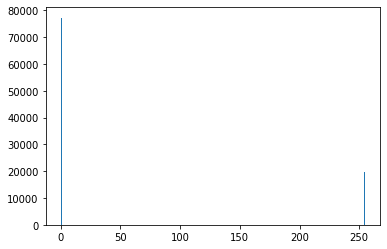

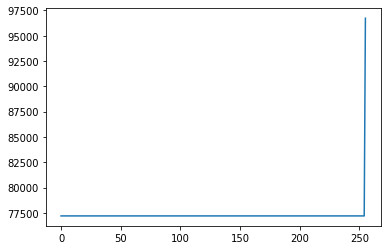

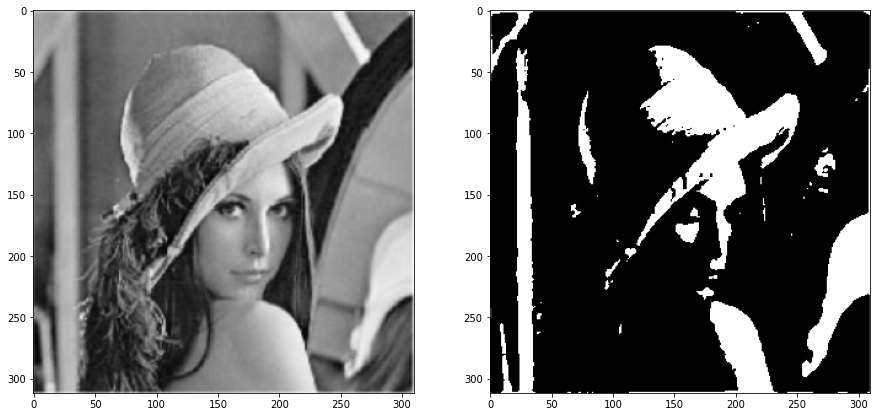

In [36]:
newImg = applyGlobalThreshold(img)
cumsum(newImg)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(newImg, cmap='gray')

plt.show(block=True)

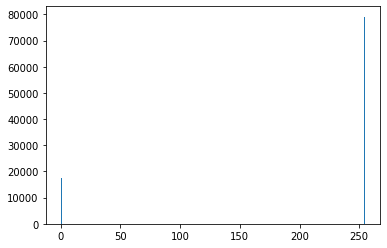

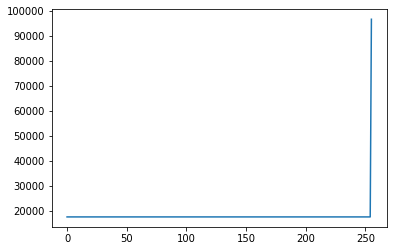

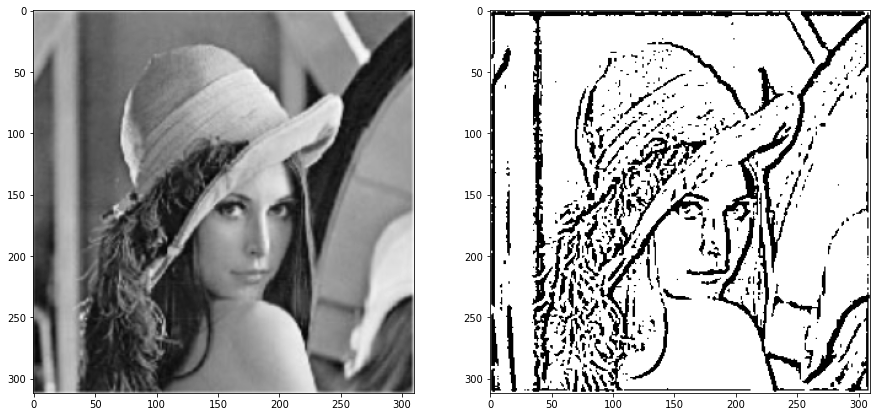

In [37]:

def localThreshold(input, blockSize = 5, C = 5):
    if blockSize % 2 == 0:
        blockSize += 1
    
    output = np.zeros_like(input)

    for x in range(input.shape[0]):
        for y in range(input.shape[1]):
            # Get the neighborhood around the pixel
            neighborhood = []
            for i in range(-blockSize // 2, blockSize // 2 + 1):
                for j in range(-blockSize // 2, blockSize // 2 + 1):
                    # Check if the pixel is within the image boundaries
                    px = x + i
                    py = y + j
                    if px >= 0 and px < input.shape[0] and py >= 0 and py < input.shape[1]:
                        neighborhood.append(input[px, py])
            
            # Compute the local threshold using the mean and constant C
            threshold = int(round(np.mean(neighborhood) - C))
            
            # Apply the threshold to the pixel
            if input[x][y] >= threshold:
                output[x][y] = 255
            else:
                output[x][y] = 0

    return output
newImg = localThreshold(img)
cumsum(newImg)
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(newImg, cmap='gray')

plt.show(block=True)

387
422
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


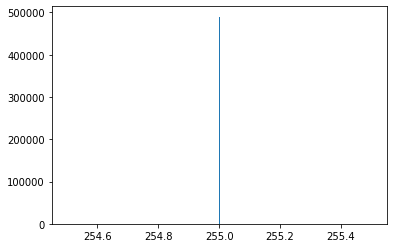

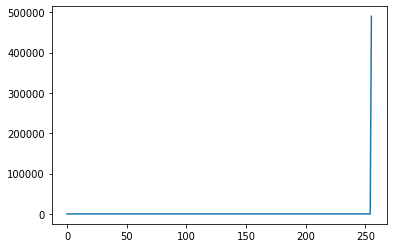

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


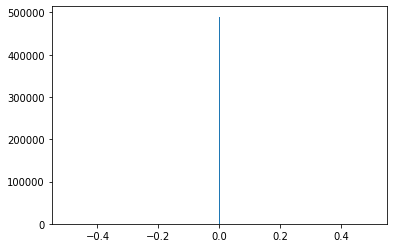

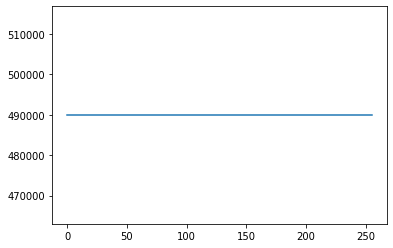

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


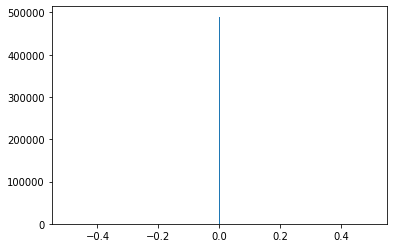

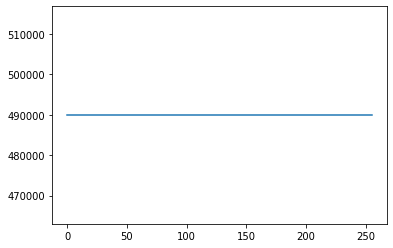

array([489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 489942., 489942., 489942., 489942., 489942., 489942.,
       489942., 4899

In [38]:

img = cv2.imread('1280px-Red_Red.png')
# determining width and height of original image
w, h = img.shape[:2]
  
# new Image dimension with 4 attribute in each pixel 
r =np.zeros_like(img)
g = np.zeros_like(img)
b = np.zeros_like(img)
print( w )
print( h )
  
for i in range(w):
   for j in range(h):
      # ratio of RGB will be between 0 and 1
      b[i][j]=(img[i][j][0])
      g[i][j]=(img[i][j][1])
      r[i][j]=(img[i][j][2])
print(r)
cumsum(r)

print(g)
cumsum(g)

print(b)
cumsum(b)
